## Nouvelle section

# **1.Installing** **PyCaret** 



In [2]:
!pip install pycaret



     |████████████████████████████████| 320 kB 6.8 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 2.0 MB 59.1 MB/s 
     |████████████████████████████████| 16.8 MB 35.6 MB/s 
     |████████████████████████████████| 118 kB 69.4 MB/s 
     |████████████████████████████████| 262 kB 52.8 MB/s 
     |████████████████████████████████| 1.3 MB 52.3 MB/s 
     |████████████████████████████████| 1.7 MB 50.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 40.5 MB/s 
     |████████████████████████████████| 6.8 MB 38.7 MB/s 
     |████████████████████████████████| 88 kB 7.2 MB/s 
     |████████████████████████████████| 102 kB 11.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 690 kB 51.5 MB/s 
     |███████████████████

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **2.Used Dataset**

This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients from April  to September (Six Months) and here is a little desciption of its features :

**ID** : The Id of each client


**AMT** : The amount of given Credit 

**SEX** :  Gender (1=male, 2=female)

**EDUCATION**  : The level of education of each customer (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

**AGE** : Age in years 

**RS_0** to **RS_6** : Repayment status by n months ago , (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

**F_AMT1** to **F_AMT6** : Amount of bill statement by n months ago

**PAMT1** TO **PATM6** : Amount of payment by n months ago 

**Default** : Default payment (1=yes, 0=no) which is the Target Column



In [4]:
import pandas as pd

In [6]:
dataset = pd.read_excel("clients credits.xlsx")
dataset

,ID,AMT,SEX,EDUCATION,MARRIAGE,AGE,RS_1,RS_2,RS_3,RS_4,...,F_AMT4,F_AMT5,F_AMT6,PAMT1,PAMT2,PAMT3,PAMT4,PAMT5,PAMT6,default
0,1,30000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1033.5,0.0,0.0,0.0,0.0,1
1,2,180000,2,2,2,26,-1,2,0,0,...,4908.0,5182.5,4891.5,0.0,1500.0,1500.0,1500.0,0.0,3000.0,1
2,3,135000,2,2,2,34,0,0,0,0,...,21496.5,22422.0,23323.5,2277.0,2250.0,1500.0,1500.0,1500.0,7500.0,0
3,4,75000,2,2,1,37,0,0,0,0,...,42471.0,43438.5,44320.5,3000.0,3028.5,1800.0,1650.0,1603.5,1500.0,0
4,5,75000,1,2,1,57,-1,0,-1,0,...,31410.0,28719.0,28696.5,3000.0,55021.5,15000.0,13500.0,1033.5,1018.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,330000,1,3,1,39,0,0,0,0,...,132006.0,46855.5,23970.0,12750.0,30000.0,7504.5,4570.5,7500.0,1500.0,0
29996,29997,225000,1,3,2,43,-1,-1,-1,-1,...,13468.5,7785.0,0.0,2755.5,5289.0,13497.0,193.5,0.0,0.0,0
29997,29998,45000,1,2,2,37,4,3,2,-1,...,31317.0,30873.0,29035.5,0.0,0.0,33000.0,6300.0,3000.0,4650.0,1
29998,29999,120000,1,3,1,41,1,-1,0,0,...,79161.0,17782.5,73416.0,128850.0,5113.5,1767.0,2889.0,79446.0,2706.0,1


In [7]:
dataset.shape

(30000, 25)

In order to demonstrate the predict_model() function on unseen data, a  1500 records has been withheld  from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. We can look this from another way  to  that these 1500 records are not available at the time when the machine learning experiment was performed.

In [8]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (28500, 25)
Unseen Data For Predictions: (1500, 25)


In [9]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [10]:
import jinja2 

# **3.Setting up Environment in PyCaret**

*   Élément de liste
*   Élément de liste



In [11]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [12]:
exp_clf101 = setup(data = data, target = 'default', session_id=123, silent=True) 


,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(28500, 25)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


## **4.Comparing All Models**

In [13]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8201,0.0000,0.3521,0.6825,0.4643,0.3693,0.3986,0.052
gbc,Gradient Boosting Classifier,0.8199,0.7829,0.3555,0.6785,0.4664,0.3706,0.3987,7.642
lda,Linear Discriminant Analysis,0.8197,0.7679,0.3707,0.6678,0.4765,0.3782,0.4023,0.361
lightgbm,Light Gradient Boosting Machine,0.8195,0.7816,0.3668,0.6693,0.4735,0.3757,0.4007,0.493
ada,Ada Boost Classifier,0.8167,0.7746,0.3311,0.6765,0.4444,0.3498,0.3820,1.699
rf,Random Forest Classifier,0.8164,0.7693,0.3582,0.6570,0.4634,0.3641,0.3886,3.945
et,Extra Trees Classifier,0.8106,0.7501,0.3700,0.6225,0.4639,0.3578,0.3758,3.100
dummy,Dummy Classifier,0.7785,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.034
lr,Logistic Regression,0.7784,0.6442,0.0000,0.0000,0.0000,-0.0002,-0.0024,0.686
knn,K Neighbors Classifier,0.7459,0.6017,0.1819,0.3557,0.2406,0.1069,0.1156,1.459


In [14]:
print(best_model)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# **5.Create a Model**

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


**5.1 Decision Tree Classifier**

In [16]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7198,0.5951,0.3710,0.3685,0.3698,0.1896,0.1896
1,0.7243,0.6052,0.3914,0.3811,0.3862,0.2084,0.2085
2,0.7398,0.6411,0.4638,0.4209,0.4413,0.2723,0.2728
3,0.7193,0.6117,0.4186,0.3791,0.3978,0.2154,0.2159
4,0.7328,0.6350,0.4593,0.4085,0.4324,0.2585,0.2592
5,0.7218,0.6166,0.4276,0.3849,0.4051,0.2242,0.2248
6,0.7223,0.5967,0.3710,0.3727,0.3719,0.1936,0.1936
7,0.7348,0.6177,0.4072,0.4027,0.4049,0.2344,0.2344
8,0.7228,0.5994,0.3778,0.3753,0.3766,0.1983,0.1983


In [17]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


**5.2 K Neighbors Classifier**

In [18]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7444,0.5862,0.1606,0.3381,0.2178,0.0876,0.0963
1,0.7378,0.6032,0.1900,0.3373,0.2431,0.0993,0.1053
2,0.7529,0.6241,0.2127,0.3933,0.2761,0.1428,0.1526
3,0.7353,0.5994,0.1674,0.3162,0.2189,0.0774,0.0831
4,0.7464,0.5966,0.1652,0.3476,0.2239,0.0947,0.1041
5,0.7504,0.6170,0.1946,0.3772,0.2567,0.1247,0.1346
6,0.7529,0.5953,0.2059,0.3906,0.2696,0.1377,0.1480
7,0.7489,0.6038,0.1810,0.3653,0.2421,0.1116,0.1215
8,0.7419,0.5923,0.1561,0.3270,0.2113,0.0795,0.0873


**5.3 Random Forest Classifier**





In [19]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8080,0.7643,0.3213,0.6311,0.4258,0.3249,0.3516
1,0.8266,0.7682,0.3869,0.6951,0.4971,0.4024,0.4277
2,0.8246,0.7886,0.3891,0.6825,0.4957,0.3990,0.4221
3,0.8115,0.7571,0.3552,0.6331,0.4551,0.3518,0.3733
4,0.8110,0.7776,0.3575,0.6295,0.4560,0.3520,0.3726
5,0.8231,0.7776,0.3846,0.6773,0.4906,0.3932,0.4163
6,0.8115,0.7657,0.3416,0.6398,0.4454,0.3443,0.3689
7,0.8231,0.7859,0.3462,0.7051,0.4643,0.3728,0.4067
8,0.8150,0.7582,0.3552,0.6515,0.4597,0.3596,0.3837


# **6.Tune a Model**

**6.1 Decision Tree Classifier**





In [20]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7466,0.3009,0.6927,0.4196,0.3296,0.3702
1,0.8266,0.7531,0.3371,0.7376,0.4627,0.3760,0.4171
2,0.8326,0.7750,0.3552,0.7621,0.4846,0.4001,0.4417
3,0.8070,0.7479,0.2964,0.6390,0.4049,0.3078,0.3402
4,0.8100,0.7486,0.3190,0.6438,0.4266,0.3280,0.3571
5,0.8276,0.7680,0.3348,0.7475,0.4625,0.3771,0.4204
6,0.8155,0.7500,0.3303,0.6697,0.4424,0.3468,0.3780
7,0.8206,0.7566,0.3213,0.7100,0.4424,0.3531,0.3926
8,0.8236,0.7562,0.3281,0.7250,0.4517,0.3639,0.4047


In [21]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


**6.2 K Neighbors Classifier**

In [22]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7759,0.6443,0.0520,0.4510,0.0933,0.0497,0.0895
1,0.7744,0.6577,0.0475,0.4200,0.0854,0.0422,0.0766
2,0.7825,0.6504,0.0679,0.5769,0.1215,0.0785,0.1400
3,0.7724,0.6563,0.0475,0.3889,0.0847,0.0383,0.0672
4,0.7815,0.6549,0.0656,0.5577,0.1174,0.0742,0.1324
5,0.7845,0.6600,0.0814,0.6000,0.1434,0.0955,0.1605
6,0.7835,0.6483,0.0701,0.5962,0.1255,0.0827,0.1476
7,0.7820,0.6753,0.0520,0.5897,0.0956,0.0619,0.1252
8,0.7749,0.6423,0.0294,0.3939,0.0547,0.0247,0.0538


In [23]:
print(tuned_knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


**6.3 Random Forest Classifier**

In [24]:
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8140,0.7458,0.3235,0.6651,0.4353,0.3395,0.3712
1,0.8276,0.7483,0.3303,0.7526,0.4591,0.3746,0.4197
2,0.8306,0.7691,0.3575,0.7453,0.4832,0.3965,0.4349
3,0.8125,0.7436,0.3077,0.6667,0.4211,0.3269,0.3617
4,0.8125,0.7446,0.3190,0.6589,0.4299,0.3335,0.3650
5,0.8241,0.7578,0.3643,0.6970,0.4785,0.3849,0.4143
6,0.8070,0.7449,0.3281,0.6223,0.4296,0.3266,0.3509
7,0.8201,0.7587,0.3235,0.7044,0.4434,0.3532,0.3913
8,0.8190,0.7512,0.3348,0.6884,0.4505,0.3573,0.3907


# **7.Plot a Model**

**7.1 AUC Plot**

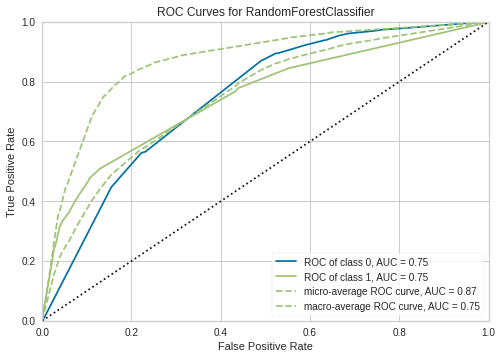

In [25]:
plot_model(tuned_rf, plot = 'auc')

**7.2 Precision-Recall Curve**

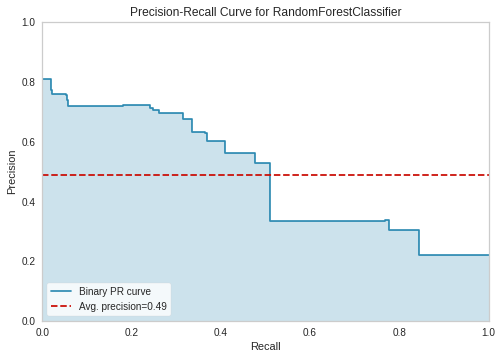

In [26]:
plot_model(tuned_rf, plot = 'pr')


**7.3 Feature Importance Plot**

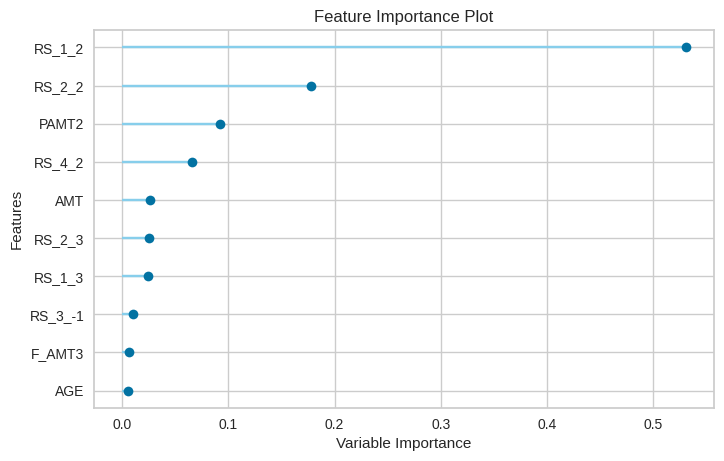

In [27]:
plot_model(tuned_rf, plot='feature')


**7.4 Confusion Matrix**

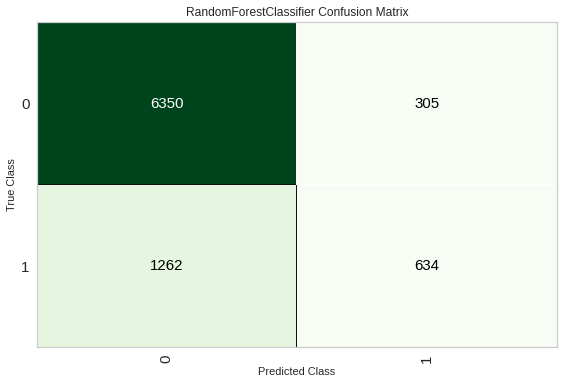

In [28]:
plot_model(tuned_rf, plot = 'confusion_matrix')


In [30]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
predict_model(tuned_rf);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7479,0.3344,0.6752,0.4473,0.3521,0.3834


# **8.Finalize Model for Deployment**

In [31]:
final_rf = finalize_model(tuned_rf)

In [32]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [33]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8215,0.7534,0.3565,0.6884,0.4698,0.3752,0.4046


# **9.Predict on unseen data**

In [34]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8253,0.7527,0.3707,0.6648,0.476,0.3812,0.4046


,ID,AMT,SEX,EDUCATION,MARRIAGE,AGE,RS_1,RS_2,RS_3,RS_4,...,F_AMT6,PAMT1,PAMT2,PAMT3,PAMT4,PAMT5,PAMT6,default,Label,Score
0,6,75000,1,1,2,37,0,0,0,0,...,30036.0,3750.0,2722.5,985.5,1500.0,1500.0,1200.0,0,0,0.8496
1,40,420000,1,1,2,31,-1,-1,2,-1,...,14215.5,13612.5,0.0,14964.0,12000.0,14287.5,1171.5,0,0,0.8027
2,58,270000,2,2,1,34,0,0,0,0,...,194877.0,12124.5,10944.0,7879.5,7221.0,7224.0,5700.0,0,0,0.9114
3,73,300000,2,2,1,32,-1,-1,-1,-1,...,4726.5,8727.0,22.5,13653.0,25.5,4747.5,2092.5,0,0,0.8027
4,104,75000,2,3,2,22,0,0,0,0,...,36141.0,2650.5,2043.0,1503.0,1260.0,1492.5,1356.0,1,0,0.8027


In [35]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8253

# **9.Saving the model**





In [36]:
save_model(final_rf,'Final RF Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_